(pandas_series)=
# Pandas `Series` Objects


Pandas [`Series`](https://pandas.pydata.org/docs/reference/series.html) essentially [`np.ndarray`s](https://numpy.org/doc/stable/reference/generated/numpy.array.html) with generalized indexing capabilities. When handling `Series` you will recognize several *syntax features* already familiar from built-in Python containers, most notably [`list`](https://docs.python.org/3/library/stdtypes.html#list) and [`dict`](https://docs.python.org/3/library/stdtypes.html#mapping-types-dict).

Let's start by noting that a [`Series` is a Python `class`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series). A (`Series`) class is a blueprint from which objects (of type `Series`) can be created. These objects have an *inner state* as given by values assigned to its attributes (also called member variables in other programming languages). An object's inner state can be queried or modified by accessing its attributes or by calling methods (also called member functions) to operate on the data.

The most important attributes for our purposes are:

* [`index`](https://pandas.pydata.org/docs/reference/api/pandas.Series.index.html#pandas.Series.index): The index is used to access that actual data stored in the `Series`. The index can be such that it allows access by a label (like in a `dict`) and not just be index (like in `list`).
* [`values`](https://pandas.pydata.org/docs/reference/api/pandas.Series.values.html#pandas.Series.values):[^`array`] A sequence container holding the actual data of a particular `dtype` (see below). The elements can be retrieved from the container using suitable method calls that refer to the `index`.
* [`size`](https://pandas.pydata.org/docs/reference/api/pandas.Series.size.html#pandas.Series.size) (or [`shape`](https://pandas.pydata.org/docs/reference/api/pandas.Series.size.html#pandas.Series.shape)): The number of elements contained in the `Series` object. The `shape` attribute returns the `size` as a one-dimensional `tuple`.
* [`dtype`](https://pandas.pydata.org/docs/reference/api/pandas.Series.size.html#pandas.Series.dtype): The data type of the elements of the `Series`. The data type is usually one of [NumPy's data types](https://numpy.org/doc/stable/reference/arrays.dtypes.html) --- in particular if we are dealing with numerical data types like floating point or integer values.

[^`array`]: The [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.values.html#pandas.Series.values) recommends using the `array` attribute or the `to_numpy()` method to access the data buffer of a `Series` object.

![](../../_build_img/PandasSeries-1.png)

Before we dive into the details of `Series` we have to make a few `import`s.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

f"Pandas version: {pd.__version__ = }, Numpy version: {np.__version__ = }"

"Pandas version: pd.__version__ = '2.1.1', Numpy version: np.__version__ = '1.26.0'"

Note how we `import`ed the `pandas` and the `numpy` package in the execution cell: It is common to alias `pandas` with `pd` and `numpy` with `np`. By referring to these aliases we can now access functions or classes defined in the respective package. As an example we access the `Series` class from the `pandas` package:

In [2]:
pd.Series

pandas.core.series.Series

## Constructing `Series` from Python objects

A straight forward way to create `Series` object is to create them from Python sequence containers like `tuple` and `list`.

In this first example we use a `list` literal containing Python `int`s to initialize the elements of the `Series`.

In [3]:
integers = pd.Series(data=[10, 30, 195, 2021])

In [4]:
integers

0      10
1      30
2     195
3    2021
dtype: int64

The output from the previous execution cell contains two columns where the right is the content of the `.index` attribute and the right is that of the `.values` attribute.

In [5]:
integers.index, integers.values

(RangeIndex(start=0, stop=4, step=1), array([  10,   30,  195, 2021]))

We note that the order to the elements in the `.values` attribute is *the same* as in the `list` used to initialize the `Series` object. Do not pay too much attention to the `array([ ... ])` output for now. In fact `.values` returns a `np.ndarray` which we will talk about in more detail later. The `.index` is integer-based in increases by one from one element to the next. This is the default used when we do not specify the index explicitly upon creation of a `Series` object.

To access the data we may also use the [`.array`](https://pandas.pydata.org/docs/reference/api/pandas.Series.array.html) attribute or the [`.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_numpy.html#pandas.Series.to_numpy) method. The [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.values.html#pandas.Series.values) actually recommends using one of the two possibilities to access the data stored in the `Series` object. 

In [6]:
integers.array

<NumpyExtensionArray>
[10, 30, 195, 2021]
Length: 4, dtype: int64

In [7]:
integers.to_numpy()

array([  10,   30,  195, 2021])

:::{note} Oftentimes it is not required to access the data with either `.values`, `.array`, or `.to_numpy()`; the `Series` class offers a large variety of methods to access and modify the data that are better suited in most cases.
:::

In a similar manner as above the we may use ` tuple` of Python `float`s to create a `Series` object.

In [8]:
floats = pd.Series((0.1, 0.2, 0.3))
floats

0    0.1
1    0.2
2    0.3
dtype: float64

:::{note} It is not possible to use Python containers that do not have "sequence semantics", i.e., that are not ordered. An example for such a container is a [`set`](https://docs.python.org/3/library/stdtypes.html#set).
:::

In [9]:
# pd.Series({1, 2, 3})

### Quiz

<span style="display:none" id="1_Series:1" class="1_Series:1">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDMsICJxdWVzdGlvbiI6ICJXaGljaCBvZiB0aGUgZm9sbG93aW5nIGF0dHJpYnV0ZXMgZG8gcGFuZGFzIFNlcmllcyBoYXZlPyIsICJhbnN3ZXJzIjogW3siY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogIi5hcnJheSJ9LCB7ImNvcnJlY3QiOiB0cnVlLCAiYW5zd2VyIjogIiAiLCAiY29kZSI6ICIuaW5kZXgifSwgeyJjb3JyZWN0IjogZmFsc2UsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogIi5jb2x1bW5zIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogIi52YWx1ZXMifSwgeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICIgIiwgImNvZGUiOiAiLmR0eXBlIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogIi5zaXplIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogIi5zaGFwZSJ9LCB7ImNvcnJlY3QiOiBmYWxzZSwgImFuc3dlciI6ICIgIiwgImNvZGUiOiAiLnJvd3MifSwgeyJjb3JyZWN0IjogZmFsc2UsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogIi5kaW0ifV19XQ==</span>

In [10]:
import jupyterquiz
jupyterquiz.display_quiz("#1_Series:1")

<IPython.core.display.Javascript object>

<span style="display:none" id="1_Series:2" class="1_Series:2">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDEsICJxdWVzdGlvbiI6ICJXaGF0IGlzIGEgdmFsaWQgd2F5IHRvIGNyZWF0ZSBhIGBTZXJpZXNgPyIsICJhbnN3ZXJzIjogW3siY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogInBkLlNlcmllcyhsaXN0KHJhbmdlKDUpKSkifSwgeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICIgIiwgImNvZGUiOiAicGQuU2VyaWVzKHtcImFcIjogMSwgXCJiXCI6IDIsIFwiY1wiOiAzfSkifSwgeyJjb3JyZWN0IjogZmFsc2UsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogInBkLlNlcmllcyh7MSwgMiwgM30pIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogInBkLlNlcmllcygoMSwgMiwgMyksIGluZGV4PWxpc3QoXCJhYmNcIikpIn0sIHsiY29ycmVjdCI6IGZhbHNlLCAiYW5zd2VyIjogIiAiLCAiY29kZSI6ICJwZC5TZXJpZXMoW1wiYVwiLCBcImJcIiwgXCJjXCJdLCBkdHlwZT1mbG9hdCkifV19XQ==</span>

In [11]:

jupyterquiz.display_quiz("#1_Series:2")

<IPython.core.display.Javascript object>

<span style="display:none" id="1_Series:3" class="1_Series:3">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDEsICJxdWVzdGlvbiI6ICJXaGF0IGRvIHlvdSBnZXQgd2hlbiBhY2Nlc3NpbmcgdGhlIGAudmFsdWVzYCBhdHRyaWJ1dGU/IiwgImFuc3dlcnMiOiBbeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICJBIG9uZS1kaW1lbnNpb25hbCBOdW1QeSBhcnJheSJ9LCB7ImNvcnJlY3QiOiBmYWxzZSwgImFuc3dlciI6ICJBIFB5dGhvbiBgbGlzdGAgb2JqZWN0In0sIHsiY29ycmVjdCI6IGZhbHNlLCAiYW5zd2VyIjogIkEgdHdvLWRpbWVuc2lvbmFsIE51bVB5IGFycmF5In0sIHsiY29ycmVjdCI6IGZhbHNlLCAiYW5zd2VyIjogIkEgUHl0aG9uIGB0dXBsZWAuIn1dfV0=</span>

In [12]:

jupyterquiz.display_quiz("#1_Series:3")

<IPython.core.display.Javascript object>

Use the cell below as scratch space to test if the given possiblities are valid or not.

In [13]:
# pd.Series(data=list("abc"), dtype=float)

## Detour: (One-dimensional) Numpy arrays

![](../../_build_img/NumpyArray-1d-1.png)

### What about the `dtype`?

As mentioned earlier `Series` usually use [`np.ndarrays`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) to store data. This has some important consequences regarding the `dtype` (which we have ignored so far).

Let's revisit our example from the previous section: 

In [14]:
integers = pd.Series([10, 30, 195, 2021])
integers

0      10
1      30
2     195
3    2021
dtype: int64

The `dtype` is here reported to be `int64` *although* we used Python `int`s to intialize the `Series` object. That is, the type of the `list` elements must have been *changed*. The reason is that the object used by Pandas to store the data under the hood (a NumPy array) does *not* support Python `int`s. 

To get an intuition about this recall that Python `int`s can be arbitrarily large in magnitude (the magnitude might be bound the by a computer's memory). The size of an `int` object in memory (meaning the number of bytes in consumes) actually depends on the magnitude of the number it represents.

In [15]:
import sys

a, b = 10, 10 ** 1000
sys.getsizeof(a), sys.getsizeof(b)  # sizes are reported in bytes

np.iinfo(np.int64), np.iinfo(np.int32)

(iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64),
 iinfo(min=-2147483648, max=2147483647, dtype=int32))

To cut the discussion short, a CPU cannot deal with `int` objects while maintaining high performance of (numerical) calculations. In order to be fast a CPU wants integers of floating point number all to have the *same* size in memory. The size of a fundamental data types as integers (or floating point numbers) is given by the number of bits used to represent them. In the example above the `int`s were converted to `int64`: "64" means that the internally 64 bits (equal to 8 bytes) are used to represent the numbers.[^base-2-representation]

[^base-2-representation]: Recall that computers internally represent number with respect to base 2 and not with respect to base 10 as we humans (mostly) prefer. Base-2 representation means that we write a number $a$ like $[a]_2 = \sum\limits_{i = 0}^{N - 1} \alpha_i 2^i$, where $\alpha_i \in [0, 1] \; \forall i$.

Because of NumPy's C heritage, a NumPy array can only contain elements of the *same* `dtype` and *same* size (in bytes). That is, all elements are, for instance, of `dtype == np.float32` or `dtype == np.int64` (the type implies the size in bytes ). Indeed, this is required for enhanced performance compared to Python `list`s.

:::{note} Recall that Python `list`s can contain any kind of (valid) Python object.
:::

In [16]:
buffer = integers.to_numpy()
type(buffer), buffer.dtype

(numpy.ndarray, dtype('int64'))

NumPy arrays can host elements of various types (see https://numpy.org/doc/stable/reference/arrays.dtypes.html) for an exhaustive list. It is also possible to convert the element's `dtype` using the [`astype()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) method. Such a conversion of types is also referred to type-casting.

Convert to 64-bit floating points values.

In [17]:
buffer.astype(np.float64)
buffer.astype("float64")
np.finfo("float64"), np.finfo("float32")

(finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64),
 finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32))

Convert to *unsigned* 32-bit integer.

In [18]:
buffer_as_uint32 = buffer.astype("uint32")
buffer_as_uint32

array([  10,   30,  195, 2021], dtype=uint32)

:::{note} An unsigned integer cannot be used to represent negative numbers. Take for example `np.uint8`: 8 bits are available the represent integers from 0, 1,..., 255 (in total $2^8 = 256$ different values). `np.int8`, on the other hand can represent values -128,..., 0,..., 127 (again, 256 different values). 
:::

:::{warning} Since the number of bits used to represent numbers is *finite* so is the magnitude of numbers (for floating points numbers this extends to the precision as well). The largest possible value representable with `np.uint8` is 255. Trying to store a value larger than this with this datatype results in quite odd behavior (wrap-arounds) that usually is undesired.

In [19]:
np.uint8(256)

/tmp/ipykernel_714/1789329364.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.uint8(256)


0

### Some properties and creation


*Conceptionally*, think of a `np.ndarray` as being somehow similar to a Python `list` containing only numeric data types (e.g. integers). For example, both can be indexed and sliced:

In [20]:
buffer_as_list = list(buffer)
buffer_as_list

[10, 30, 195, 2021]

Use positional index given by a positive integer.

In [21]:
buffer[0], buffer_as_list[0]

(10, 10)

Index from the end with negative integer.

In [22]:
buffer[-1], buffer_as_list[-1]

(2021, 2021)

Slicing.

In [23]:
buffer[1::2], buffer_as_list[1::2]

(array([  30, 2021]), [30, 2021])

As for `Series` objects, `np.ndarray`s can be created from Python sequence containers:

In [24]:
a_from_list, a_from_tuple = (
    np.array(list(range(5))), 
    np.array(tuple(range(5))),
)

a_from_list, a_from_tuple

(array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]))

The `dtype` can be fixed when creating a NumPy array:

In [25]:
a_of_int32, a_of_float32 = (
    np.array(list(range(5)), dtype="int32"),  # specify dtype when creating np.ndarray
    np.array(list(range(5)), dtype="float32")
)

a_of_int32, a_of_float32

(array([0, 1, 2, 3, 4], dtype=int32),
 array([0., 1., 2., 3., 4.], dtype=float32))

Recall that a NumPy array can only contain elements with the same `dtype`. As a consequence, if values of mixed type --- say, a list with Python `float`s and `int`s --- are given to the intializer upon array creation, a type conversion will be automatically performed to make all entries of the array to have the same `dtype`. If `int` and `float` are mixed the resulting `dtype` will also be a floating point type (usually `np.float64`). Why is this? Well, using a floating point type we can represent integer values (1 will be 1.0) but with an integer type we fail to represent floating points types: converting 2.134 to an `int` would mean chopping off the decimal places yielding 2. This implies a loss of information.

:::{note} When mixing `int` and `float` in the initialization of a `np.ndarray` the resulting `dtype` will be floating points type (sually `np.float64`).
:::

In [26]:
a_from_mixed_input_types = np.array([
    1, 2, 3,          # Python integers 
    10.12, 20.45, 30.45  # Python floats
])
a_from_mixed_input_types.dtype, a_from_mixed_input_types

# int(10.345)

(dtype('float64'), array([ 1.  ,  2.  ,  3.  , 10.12, 20.45, 30.45]))

Needless to say, but it does not make sense to mix numerical types (e.g., `int` and `float`) and container types (like `list` and `tuple`) in a NumPy array. This will result in a `ValueError`.

In [27]:
np.array([1, (10,), [20,]])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

Other ways to create NumPy arrays are using factory functions available from the `np` namespace.

An array containing only 1s.

In [28]:
np.ones((5,), dtype="int32") # array of size = 5 with all elements == 1

array([1, 1, 1, 1, 1], dtype=int32)

An array containing only 0s.

In [29]:
np.zeros((5,))

array([0., 0., 0., 0., 0.])

An array containing only 5s. And yes, it is possible to conduct arithmectic operations between `ndarray`s and also between a `ndarray` and a scalar value. The latter may be helpful [one of the exercises below](numpy-one-dimension-min-max-scaling).

In [30]:
np.array([1, 2]) / np.array([3, 1.45e-33])

array([3.33333333e-01, 1.37931034e+33])

### Revisited: Constructing `Series`  

Now that we have learned about NumPy Arrays it seems quite obvious that we construct `Series` from `np.ndarray`s:


In [31]:
pd.Series((
    1.0, # float
    1,   # int
    # complex(1, 2), # complex
))

0    1.0
1    1.0
dtype: float64

We note that reported `dtype` is `float32`, the same as specified for the NumPy Array.

The phenomenon of type conversion when initializing a `Series` from a Python container (which usually can hold elements with *distinct* type) also pertains to `Series`.

In [32]:
# Fill the gap!

### Quiz

<span style="display:none" id="1_Series:4" class="1_Series:4">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDEsICJxdWVzdGlvbiI6ICJXaGljaCBhcmUgdHJ1ZSBzdGF0ZW1lbnRzIGFib3V0IGEgc2lnbmVkIDgtYml0IGludGVnZXIgYW5kIC8gb3IgYW4gdW5zaWduZWQgMzItYml0IGludGVnZXI/IiwgImFuc3dlcnMiOiBbeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICJUaGUgMzItYml0IGludGVnZXIgY2FuIHJlcHJlc2VudCBsYXJnZSBudW1iZXJzIHRoYXQgY2FuIGJlIHBvc2l0aXZlIGFzIHdlbGwgYXMgbmVnYXRpdmUuIEEgOC1iaXQgdW5zaWduZWQgaW50ZWdlciBjYW4gb25seSByZXByZXNlbnQgcG9zaXRpdmUgdmFsdWVzIHVwIHRvIDI1NSBhbmQgemVyby4ifSwgeyJjb3JyZWN0IjogZmFsc2UsICJhbnN3ZXIiOiAiQSA4LWJpdCB1bnNpZ25lZCBpbnRlZ2VyIGNhbiByZXByZXNlbnQgcG9zaXRpdmUgYXMgd2VsbCBhcyBuZWdhdGl2ZSBudW1iZXJzIHdoaWxlIGEgMzItYml0IHNpZ25lZCBpbnRlZ2VyIGNhbm5vdC4ifSwgeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICJXaGVuIGNob29zaW5nIGEgOC1iaXQgdW5zaWduZWQgaW50ZWdlciB3ZSBoYXZlIHRvIGJlIGNlcnRhaW4gdGhlIG51bWJlcnMgaXQgc2hhbGwgcmVwcmVzZW50IGFyZSBwb3NpdGl2ZSAob3IgemVybykgYW5kIHNtYWxsZXIgdGhhbiAyNTYuIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiQSAzMi1iaXQgc2lnbmVkIGludGVnZXIgaXMgYSByZWFzb25hYmxlIGNob2ljZSBmb3IgbWFueSB1c2UgY2FzZXMgcmVxdWlyaW5nIGludGVnZXJzLiJ9LCB7ImNvcnJlY3QiOiBmYWxzZSwgImFuc3dlciI6ICJBIDMyLWJpdCBpbnRlZ2VyIGlzIHRoZSB0eXBlIG9mIGludGVnZXIgUHl0aG9uIHVzZXMgaW50ZXJuYWxseS4ifV19XQ==</span>

In [33]:

jupyterquiz.display_quiz("#1_Series:4")

<IPython.core.display.Javascript object>

You are given the `ndarray`

```python
>>> a = np.array([1, 2, 3, 4, 5])
```


<span style="display:none" id="1_Series:5" class="1_Series:5">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDMsICJxdWVzdGlvbiI6ICJXaGF0IGFyZSB2YWxpZCB3YXlzIHRvIGFjY2VzcyB0aGUgbWlkZGxlIGVsZW1lbnQgd2l0aCB2YWx1ZSAzPyIsICJhbnN3ZXJzIjogW3siY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogImFbMl0ifSwgeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICIgIiwgImNvZGUiOiAiYVstM10ifSwgeyJjb3JyZWN0IjogZmFsc2UsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogImFbMV0ifSwgeyJjb3JyZWN0IjogZmFsc2UsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogImFbLTFdIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogImxpc3QoYSlbLTNdIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogInR1cGxlKGEpWzJdIn1dfV0=</span>

In [34]:

jupyterquiz.display_quiz("#1_Series:5")

<IPython.core.display.Javascript object>

In [35]:
# np.array([1, 2, 3, 4, 5])[-1]

Have a look at the following assignments: 

```python
>>> a = np.array([0, 1, 2, 3, 4])
>>> a[:2] = [10, 20][::-1]
>>> a[-1] = -100
```


In [36]:
a = np.array([0, 1, 2, 3, 4])
a[:2] = [10, 20][::-1]
a[-1] = -100
a

array([  20,   10,    2,    3, -100])

<span style="display:none" id="1_Series:6" class="1_Series:6">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDIsICJxdWVzdGlvbiI6ICJXaGF0IGlzIHRoZSBjb250ZW50IG9mIHRoZSBhcnJheXMgYWZ0ZXIgdGhlIGFzc2lnbm1lbnQ/IiwgImFuc3dlcnMiOiBbeyJjb3JyZWN0IjogZmFsc2UsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogIlswLCAxLCAyLCAzLCA0LCA1XSJ9LCB7ImNvcnJlY3QiOiBmYWxzZSwgImFuc3dlciI6ICIgIiwgImNvZGUiOiAiWzEwLCAyMCwgMiwgMywgLTEwMF0ifSwgeyJjb3JyZWN0IjogZmFsc2UsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogIlstMTAwLCAyLCAzLCAyMCwgMTBdIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogIlsyMCwgMTAsIDIsIDMsIC0xMDBdIn0sIHsiY29ycmVjdCI6IGZhbHNlLCAiYW5zd2VyIjogIiAiLCAiY29kZSI6ICJbIF0ifV19XQ==</span>

In [37]:

jupyterquiz.display_quiz("#1_Series:6")

<IPython.core.display.Javascript object>

### Exercises

#### Array creation

Write a function `make_array` that can create an array of size N with values `[0, ..., N - 1]` with a specified dtype. That is, if the N = 3 and the `dtype` is `np.int32`, the array values should be `[0, 1, 2]`. If N = 5 and the `dtype` is `np.float32` the array values are `[0.0, 1.0, 2.0, 3.0, 4.0]`. Other size-`dtype` combinations must be possible as well. The `dtype` should be defaulted to `np.int32`.

In [38]:
def make_array(N, dtype=np.int32):
    # return np.array(
    #     range(N),
    #     dtype=dtype
    # )
    return np.arange(N, dtype=dtype)

make_array(5)
# make_array(5, dtype=np.float32)

array([0, 1, 2, 3, 4], dtype=int32)

#### Factory functions

Use two different factor functions to create two `ndarray` of size 10 with values 100 (an integer!).

In [39]:
a = 100 + np.zeros((10,))
# a = 100 * np.ones((10,))
a

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.])

In [40]:
b = np.full(shape=(10,), fill_value=100)
b

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100])

#### Vector norm

`ndarray`s can interpreted as vectors (e.g. a three-dimensional vector describing some directions in the 3D space we live in). Let $\boldsymbol{v} \in \mathbb{R}^3$ be such a vector. The *length* of such a vector is defined by the equation

$$
l = \sqrt{v_1^2 + v_2^2 + v_3^3} = \sqrt{\sum_{i = 1}^3 v_i^2},
$$

where $v_i$ with $i = 1, 2, 3$ are the components of the vector. You are given the `ndarray` below and consider it to be a three-dimensional vector. Compute its length in 3 different ways.

In [41]:
v = np.arange(1, 4)
v

array([1, 2, 3])

1. Accessing the vector elements by index.

In [42]:
np.sqrt(v[0] ** 2 + v[1] ** 2 + v[2] ** 2)

3.7416573867739413

2. Use [mathematical functions](https://numpy.org/doc/stable/reference/routines.math.html#sums-products-differences).

In [43]:
# v_squared = v ** 2
# sum_of_squared_elements = np.sum(v_squared)
# np.sqrt(sum_of_squared_elements)
# np.sqrt(np.sum(np.square(v)))
np.sqrt(np.sum(np.power(v, 2)))

3.7416573867739413

3. A *single* suitable function from NumPy's [`linalg`](https://numpy.org/doc/stable/reference/routines.math.html#sums-products-differences) module.

In [44]:
np.linalg.norm(v), np.sqrt(np.dot(v, v)), np.sqrt(v @ v)

(3.7416573867739413, 3.7416573867739413, 3.7416573867739413)

(numpy-one-dimension-min-max-scaling)=
#### Min-max scaling

Given the array `a` below, scale all its values to lie in the range $[0, 1]$. Store the rescaled `ndarray` in a variable with named `a_scaled`.

In [45]:
a = np.arange(10, 110, 10)
a

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [46]:
min_value, max_value = np.min(a), np.max(a)
min_value, max_value

# a_scaled = a.copy()
# for idx in range(len(a)):
#     a_scaled[idx] -= min_value
a_scaled = (a - min_value) / (max_value - min_value)
a_scaled

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [47]:
a = np.ones((1_000_000,), dtype="int32")

In [48]:
%timeit a - 1000

122 µs ± 1.65 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [49]:
%%timeit

for idx in range(len(a)):
    a[idx] - 1000

1.84 s ± 7.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Cross product

The so-called corss product between two vectors $\boldsymbol{v}, \boldsymbol{w} \in \mathbb{R}^3$ is defined by 

$$
\boldsymbol{v} \times \boldsymbol{w} = 
\begin{bmatrix}
v_2 w_3 - v_3 w_2\\
v_3 w_1 - v_1 w_3\\
v_1 w_2 - v_2 w_1
\end{bmatrix},
$$

where $v_i, w_i$ with $i = 1, 2, 3$ are the components of each vector. Compute the cross product of `v` and `w` defined below by accessing the right elements *by index* and store result in a `ndarray`. You can test your result with the [`np.cross`](https://numpy.org/doc/stable/reference/generated/numpy.cross.html#numpy.cross) function.

In [50]:
v, w = np.array(range(1, 4)), np.array(range(3, 0, -1))
v, w

(array([1, 2, 3]), array([3, 2, 1]))

In [51]:
np.array([
    v[1] * w[2] - v[2] * w[1],
    v[2] * w[0] - v[0] * w[2],
    v[0] * w[1] - v[1] * w[0],
]), np.cross(v, w)

(array([-4,  8, -4]), array([-4,  8, -4]))

## Indexing

We are aware positional indexing of Python sequence containers and --- at the latest after the last section :-) --- `np.ndarray`s:[^advanced-indexing]

* Using a positive integer to refer to positions from the front or a negative integer to refer to positions from the back.
* Slicing `start:stop:stride` to access a subset of elements in a systematic way.

[^advanced-indexing]: NumPy arrays also support so-called advanced (fancy) indexing which we will learn about in the context of `Series`. Refer to [this link](https://numpy.org/doc/stable/user/basics.indexing.html) for details on the indexing capabilities of `np.ndarray`s.

The preferred way to access the elements of a `Series` object is using the `.loc` and `.iloc` methods which we will learn about in the next section.

(series-indexing-with-loc-and-iloc)=
### Indexing with `.loc`, `.iloc` methods
- [`.loc[<index value>]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.loc.html)
    - access by (index) label
    - slices include both end points

- [`.iloc[<index value>]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)
    - numeric indexing with integers, from 0
    - slices exclude the end point (as with e.g. ranges)

Before we actually dive into how to use these methods, let's introduce two ways of creating a `Series` with specification of the index.

Use a Python `dict`. The keys will be entries in `.index`, the values will be the entries in `.values`.

In [52]:
s_from_dict = pd.Series({"a": 10, "b": 20, "c": 30, "d": 40})
s_from_dict

a    10
b    20
c    30
d    40
dtype: int64

Specifiy the `index` argument of the `Series` initializer (and `data` for the values to be hosted by the `Series` object).

In [53]:
s = pd.Series(list(range(10, 50, 10)), index=list("abcd"))
s

a    10
b    20
c    30
d    40
dtype: int64

To access the position in `.values` where the `.index` holds and `"a"` we need the `.loc[]` method, i.e., getting the corresponding entry from `.values` is proxied via the index. Ignoring the content of `.index` and just going by the position in the `.values` attribute means using the `.iloc[]` method. 

In [54]:
(
    s.loc["c"], # refers to the "real" index
    s.iloc[2],  # refers to the position inside the series object
)

(30, 30)

Slicing is possible with both methods, however, the semantics are different. When using slicing with `.loc[]` the *end* of the slice is included as well.[^not-using-end-would-be-strange]

[^not-using-end-would-be-strange]: In fact, ignoring the end would be strange if a non-sorted, non-integer index is used. Imagine the case where you have `.index` entries that are not ordered (maybe it is not even possible to establish an ordering relation). Then ignoring the end would be semantically questionable. Ignoring the end does only make sense if positional indexing is used via the `.loc[]` method.

In [55]:
s.loc["b":"c"], s.iloc[1:-1]

(b    20
 c    30
 dtype: int64,
 b    20
 c    30
 dtype: int64)

In [56]:
# some_series = pd.Series(data=list(range(0, 110, 10)))
# some_series.loc[1:5], some_series.iloc[1:5]

:::{note} As you may have noticed using a stride like in `start:stop:stride` does not really make sense when using slicing the the `.loc[]` method.
:::

:::{note} Note how both the `.loc[]` as well as the `.iloc[]` methods *may* return `Series` if the slices contain more than a single element.
:::

One final example to highlight the differences between `.loc[]` and `.iloc[]`.

In [57]:
yearly_numbers = pd.Series(data=[137, 214, 195, 271], index=[2014, 2016, 2018, 2020])
yearly_numbers

2014    137
2016    214
2018    195
2020    271
dtype: int64

In [58]:
yearly_numbers.loc[2020], yearly_numbers.iloc[-1]

(271, 271)

In [59]:
yearly_numbers.iloc[0:2]

2014    137
2016    214
dtype: int64

In [60]:
yearly_numbers.loc[2014:2018]

2014    137
2016    214
2018    195
dtype: int64

### Setting values

Like some of Python's built-in containers `Series` are *mutable*. That is, once a `Series` object has been created, its attributes (e.g., `.index`, and `.values`) may be modified. The preferred way to modify a `Series` element-wise --- the entries of `.values`, to be more precise --- is to use `.loc` (and `.iloc`) with suitable indexing.

In [61]:
yearly_numbers = pd.Series(data=[137, 214, 195, 271], index=[2014, 2016, 2018, 2020])
yearly_numbers

2014    137
2016    214
2018    195
2020    271
dtype: int64

In the following line we change the data by addressing a particular index label with `.loc[]`:

In [62]:
yearly_numbers.loc[2016] = 445 # Series objects are *mutable*!!!
yearly_numbers

2014    137
2016    445
2018    195
2020    271
dtype: int64

We note that the reported `dtype` is `int64`. Now let's see what happens if we assign a floating point value (a Python `float`) to a location in the `Series` object. Again, we use the `.loc[]` method for this.

In [63]:
yearly_numbers.loc[2016] = 300.78
yearly_numbers

/tmp/ipykernel_714/866176709.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '300.78' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  yearly_numbers.loc[2016] = 300.78


2014    137.00
2016    300.78
2018    195.00
2020    271.00
dtype: float64

Trying to fully revert this modification will not work because an integer value can be represented as floating point value. As a result, the value can be changed but the `dtype` of the `Series` object will remain `float64`.

In [64]:
yearly_numbers.loc[2016] = 445
yearly_numbers

2014    137.0
2016    445.0
2018    195.0
2020    271.0
dtype: float64

Finally, we also note that we can assign to a slice of data as well.

In [65]:
yearly_numbers.loc[2014:2018] = list(range(1_000, 4_000, 1_000)) # we have seen this earlier with np.ndarrays (quiz!)
yearly_numbers

2014    1000.0
2016    2000.0
2018    3000.0
2020     271.0
dtype: float64

:::{warning} While it is technically possible to mix numerical types and e.g. `string`s,

```python
>>> yearly_numbers.loc[2014:2018] = ["this", "also", "works"]
>>> yearly_numbers
2014     this
2016     also
2018    works
2020    271.0
dtype: object
```
it is *not* recommended. The elements of the `Series` are now of type `object` (although some of them still are numbers) which will severly limit computational performance. Apart from that the semantics of operations between elements of the `Series` (e.g., adding them up) is unclear because who knows what adding a number and string is supposed to mean?
:::

In [66]:
# yearly_numbers.loc[2014:2018] = ["this", "also", "works"]
# yearly_numbers.sum()

### Non-unique indices

So far we have only dealt with cases where the content of `.index` was *unique*, i.e., none of the entries occurred more than once. With Pandas `Series`, this need not be the case (contrary to e.g. Python `dicts`). Queries for for entries with a particular index (label) have the same syntax as in case of unique `.index` entires but the return type will be *different*.

Let's have an example:

In [67]:
logon_times = pd.Series([10, 23, 51, 2], index=["root", "giar", "czerner", "root"])
logon_times

root       10
giar       23
czerner    51
root        2
dtype: int64

The index contains the `root` entry twice. Now, we query all entries with this index:

In [68]:
logon_times_root = logon_times.loc["root"]
type(logon_times_root), logon_times_root

(pandas.core.series.Series,
 root    10
 root     2
 dtype: int64)

:::{note} Queries with a non-unique index return another `Series` while queries for a unique index yield an element of the particular `dtype`. The resulting `Series` has `.size` equal to the number of occurrences of the corresponding index value and the same `dtype` as the original `Series` object.
:::

![Result of query for unique / non-unique label in index.](../../_build_img/SeriesQueryLoc-1.png)

In [69]:
type(logon_times.loc["giar"])

numpy.int64

In [70]:
# Fill the gap!

### Fancy indexing and boolean masks

#### Detour: NumPy Arrays

In contrast to `Series` NumPy Arrays only support integer indexing. Well, this is not the full story...NumPy also supports so-called advanced indexing. Advanced indexing is based on sequences of `int`s or `bool`s (e.g. a `list[int]`, or `list[bool]`).

Consider the following NumPy array ([`np.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) works similar to Python's `range`):


In [71]:
a = np.arange(10, 110, 10)
a

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

Instead of passing a single integer index, we pass `list[int]`. Note, however, that each of the entries must be a *valid* index of the array.

In [72]:
list_of_indices: list[int] = [0, 2, 4, 6, -1]
a[list_of_indices]

array([ 10,  30,  50,  70, 100])

Another option is to use so-called boolean masks; essentially these often are `list[bool]` (`list` with `bool`ean entries). A boolean mask is a sequence of the same length as the NumPy array containing `True` and / or `False` values. An element of the NumPy array will be returned if the entry at the corresponding position in the mask is `True`. The result of this operation will be a new NumPy array (possibly with a different size).

![NumPy masking](../../_build_img/NumpyMaskEven-1.png)

To illustrate this principle let's assume that we want to return all entries from the array that are *odd* numbers. A corresponding mask must have `True` at the positions where there is an odd number in the array. Such a mask can be programmatically generated with a list comprehension (there is a better, more performant way, which we learn about in a moment).

In [73]:
a = np.array([1, 3, 4, 8, 11, 13, 16])
a_uneven = [
    x for x in a
    if x % 2 != 0
]
a_uneven

[1, 3, 11, 13]

In [74]:
mask = [x % 2 == 1 for x in a]
mask

[True, True, False, False, True, True, False]

In [75]:
a[mask]

array([ 1,  3, 11, 13])

In [76]:
# mask_uneven = a % 2 == 1
# mask_uneven

a[a % 2 == 1]

array([ 1,  3, 11, 13])

:::{warning} While it is possible (as we have just seen) it is strongly discouraged to use Python loop constructs (`list` comprehension, `for` loops) to traverse NumPy arrays. NumPy arrays conveniently support algebraic operations that we now from "fundamental" data types such as `flaot` and `int`. In fact, the list comprehension `[x % 2 == 1 for x in a]` can (and should!) be replaced with:

```python
a % 2 == 1
```
The result will another a `np.ndarray[bool]` instead of a `list` and this operation will be much more performant than the `list` comprehension.
:::

Finally, we note that `bool`ean algebra can also be used with `np.ndarray[bool]`. If we additionally to selecting even elements we also want the value to be at least 4 we can say: 

In [77]:
mask_uneven = a % 2 == 1
mask_ge_11 = a >= 11
mask_combined = mask_uneven & mask_ge_11
mask_combined
# a[mask_combined]
a[(a % 2 == 1) & (a >= 11)]

array([11, 13])

The `&` means *element-wise* logical and; similarly, `|` means element-wise logical or. The `~` symbol denotes logical negation.

The following sketch gives an example for logical conjunction with boolean masks.

![Boolean algebra with masks](../../_build_img/NumpyBooleanAlgebra-1.png)

In [78]:
~mask_combined, np.logical_not(mask_combined)

(array([ True,  True,  True,  True, False, False,  True]),
 array([ True,  True,  True,  True, False, False,  True]))

In [79]:
a[~mask_combined]

array([ 1,  3,  4,  8, 16])

(series-advanced-indexing-and-boolean-masks)=
### `Series`

We can directly use the principles just learned for `Series`. All we have to is to call the `.loc[]` / `.iloc[]` method with either a `list` containing valid labels / positions on a `Series` object.

In [80]:
s = pd.Series(data=range(0, 100, 10), index=[f"a{idx}" for idx in range(10)])
s

a0     0
a1    10
a2    20
a3    30
a4    40
a5    50
a6    60
a7    70
a8    80
a9    90
dtype: int64

We set up two `list`s: One containing labels from the index of the `Series`, and another one containing positions.

In [81]:
labels_to_extract, positions_to_extract = (
    ["a1", "a4", "a8", "a7"],
    list(range(0, 10, 2)),
)
labels_to_extract, positions_to_extract

(['a1', 'a4', 'a8', 'a7'], [0, 2, 4, 6, 8])

We apply the `list` of index labels with the `.loc[]` method.

In [82]:
s.loc[labels_to_extract] # fancy indexing / advanced indexing

a1    10
a4    40
a8    80
a7    70
dtype: int64

The `list` of positions is passed to the `.iloc[]` method.

In [83]:
s.iloc[positions_to_extract]

a0     0
a2    20
a4    40
a6    60
a8    80
dtype: int64

:::{note} Both operations return a new `Series` object.
:::

What about boolean masks? Since `Series` are somewhat of a wrapper around NumPy arrays, of course they also support extracting elements with boolean masks. To have a nice transition to the [next section](operations-on-series) we will derive a boolean mask as follows: 

In [84]:
mask = (s % 20 == 0)
mask

a0     True
a1    False
a2     True
a3    False
a4     True
a5    False
a6     True
a7    False
a8     True
a9    False
dtype: bool

We have used a `Series` object in a boolean expression like we usually do it with variables like `float` or `int`. Internally, the boolean expression will be applied to every element and the results will be returned as a new `Series` object. Note, however, that the `dtype` is now reported as `bool` (it is `int64` in the original `Series`). This is because the result of a boolean expression is of type `bool`. 

Now we can use this boolean mask (or `Series` of `bool`s, if you prefer this). It might appear somehow strange that `.loc[]` also accepts *another* `Series` but, well, it works :-).

In [85]:
s.loc[mask]

a0     0
a2    20
a4    40
a6    60
a8    80
dtype: int64

### Quiz

<span style="display:none" id="1_Series:7" class="1_Series:7">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDEsICJxdWVzdGlvbiI6ICJXaGF0IGlzIHRoZSBkaWZmZXJlbmNlIGJldHdlZW4gdGhlIGAubG9jW11gIGFuZCB0aGUgYC5pbG9jW11gIG1ldGhvZD8iLCAiYW5zd2VycyI6IFt7ImNvcnJlY3QiOiBmYWxzZSwgImFuc3dlciI6ICJUaGVyZSBpcyBub3QgZGlmZmVyZW5jZS4ifSwgeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICJgLmxvY1tdYCBxdWVyaWVzIHRoZSBpbmRleCB3aGlsZSBgLmlsb2NbXWAgcXVlcmllcyB0aGUgcG9zaXRpb24gaW5kZXguIn0sIHsiY29ycmVjdCI6IGZhbHNlLCAiYW5zd2VyIjogImAubG9jW11gIHF1ZXJpZXMgdGhlIHBvc2l0aW9uIGluZGV4IHdoaWxlIGAuaWxvY1tdYCBxdWVyaWVzIHRoZSBpbmRleC4ifV19XQ==</span>

In [86]:

jupyterquiz.display_quiz("#1_Series:7")

<IPython.core.display.Javascript object>

<span style="display:none" id="1_Series:8" class="1_Series:8">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDEsICJxdWVzdGlvbiI6ICJXaGF0IGFyZSB0cnVlIHN0YXRlbWVudHMgYWJvdXQgdGhlIGAubG9jW11gIG1ldGhvZD8iLCAiYW5zd2VycyI6IFt7ImNvcnJlY3QiOiB0cnVlLCAiYW5zd2VyIjogIkl0IGlzIHRoZSBwcmVmZXJyZWQgbWV0aG9kIHRvIGFjY2VzcyBhIHJvdyAvIG11bHRpcGxlIHJvd3Mgb2YgYSBgU2VyaWVzYC4ifSwgeyJjb3JyZWN0IjogZmFsc2UsICJhbnN3ZXIiOiAiSXQgY2Fubm90IGRlYWwgd2l0aCBmYW5jeSBpbmRleGluZyBsaWtlIE51bVB5IGFycmF5cy4ifSwgeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICJCb29sZWFuIG1hc2tzIGFyZSB2YWxpZCBhcmd1bWVudHMuIn0sIHsiY29ycmVjdCI6IGZhbHNlLCAiYW5zd2VyIjogIldoZW4gdXNpbmcgc2xpY2luZyB0aGUgZW5kIG9mIHRoZSBzbGljZSBpcyBub3QgaW5jbHVkZWQgaW4gdGhlIG91dHB1dC4ifSwgeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICJXaGVuIHVzaW5nIHNsaWNpbmcgdGhlIGVuZCBvZiB0aGUgc2xpY2UgaXMgYWx3YXlzIGluY2x1ZGVkIGluIHRoZSBvdXRwdXQuIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiU2xpY2luZyBpcyBub3QgcG9zc2libGUgYW55bW9yZSB3aGVuIHRoZSBpbmRleCBoYXMgZHVwbGljYXRlIGVudHJpZXMuIn0sIHsiY29ycmVjdCI6IGZhbHNlLCAiYW5zd2VyIjogIkl0IGNhbm5vdCBiZSB1c2VkIHRvIGFsdGVyIGRhdGEgZWxlbWVudHMuIn1dfV0=</span>

In [87]:

jupyterquiz.display_quiz("#1_Series:8")

<IPython.core.display.Javascript object>

Consider the following `Series` and the subsequent assignment:

```python
>>> s = pd.Series(data=[1.0, 2, 3.0, 4, 5.0], index=list("abcde")) 
>>> s.loc["a"] = 100
```

In [135]:
s = pd.Series(data=[1.0, 2, 3.0, 4, 5.0], index=list("abcde"))
s.loc["a"] = 100
s

a    100.0
b      2.0
c      3.0
d      4.0
e      5.0
dtype: float64

<span style="display:none" id="1_Series:9" class="1_Series:9">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDEsICJxdWVzdGlvbiI6ICJXaGF0IGlzIHRoZSBgZHR5cGVgIG9mIHRoZSBgU2VyaWVzYCBhZnRlciB0aGUgYXNzaWdubWVudD8gKEFsc28gdHJ5IHRvIGNvbWUgdXAgd2l0aCBhIHJlYXNvbikiLCAiYW5zd2VycyI6IFt7ImNvcnJlY3QiOiB0cnVlLCAiYW5zd2VyIjogIiAiLCAiY29kZSI6ICJmbG9hdDY0In0sIHsiY29ycmVjdCI6IGZhbHNlLCAiYW5zd2VyIjogIiAiLCAiY29kZSI6ICJpbnQ2NCJ9LCB7ImNvcnJlY3QiOiBmYWxzZSwgImFuc3dlciI6ICIgIiwgImNvZGUiOiAiY29tcGxleDEyOCJ9LCB7ImNvcnJlY3QiOiBmYWxzZSwgImFuc3dlciI6ICIgIiwgImNvZGUiOiAiaW50MzIifSwgeyJjb3JyZWN0IjogZmFsc2UsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogInVpbnQzMiJ9XX1d</span>

In [88]:

jupyterquiz.display_quiz("#1_Series:9")

<IPython.core.display.Javascript object>

### Exercises

#### Modification

You are given a `Series` with labels `["a", "b", "c", "d", "e", "f", "g", "h"]` in the index. 

In [137]:
index = ["a", "b", "c", "d", "e", "f", "g", "h"]

s = pd.Series(data=range(1, len(index) + 1), index=index)
s

a    1
b    2
c    3
d    4
e    5
f    6
g    7
h    8
dtype: int64

Modify the data elements with index labels `"c"`, `"d"`, `"e"`, and "`f`" to be 10x as larger as in the initial `Series`.

In [138]:
s.loc['c':'f'] *= 10
s

a     1
b     2
c    30
d    40
e    50
f    60
g     7
h     8
dtype: int64

Set all remaining data elements to 0.

In [140]:
s.loc[['a', 'b', 'g', 'h']] = 0
s

a     0
b     0
c    30
d    40
e    50
f    60
g     0
h     0
dtype: int64

#### Boolean mask

Consider the following `Series`.

In [142]:
index = ["aab", "bab", "caa", "daad", "ebc", "fja", "grq", "haa"]

s = pd.Series(data=range(1, len(index) + 1), index=index)
s

aab     1
bab     2
caa     3
daad    4
ebc     5
fja     6
grq     7
haa     8
dtype: int64

Return a `Series` that only contains index labels with two `"a"` characters.

In [144]:
mask = [label.count('a') == 2 for label in s.index]
mask

[True, False, True, True, False, False, False, True]

Next consider this `Series`:

In [145]:
index = ["aab", "bab", "caa", "daab", "ebc", "fja", "grb", "haab"]

s = pd.Series(data=range(1, len(index) + 1), index=index)
s

aab     1
bab     2
caa     3
daab    4
ebc     5
fja     6
grb     7
haab    8
dtype: int64

Return a `Series` that contains entries with index labels ending with `"b"` and that have even data elements.

In [148]:
mask = np.array([label.endswith('b') for label in s.index])
mask_even = s % 2 == 0
s.loc[mask & mask_even]

bab     2
daab    4
haab    8
dtype: int64

(operations-on-series)=
## Operations between `Series`

We will now generalize the what we have just seen in the [previous section](series-advanced-indexing-and-boolean-masks) to other kinds of binary operations. A *binary operator* combines two so-called *operands* --- a left-hand-side (lhs), and a right-hand-side (rhs) --- to compute the result of the particular operation.  

```
lhs <operator> rhs
```

`Series` support the common arithmetic operations like addition, multiplication, and division, ...

- Operations are performed element-wise if the index is the default counter-based index (somewhat like adding two vectors in linear algebra).
- With other `Series`: The operations are performed *by index*. That is, operations are performed between elements that share *the same* index label (the content of `.index`) in both `Series`.
- With scalar values: The scalar value is broadcasted to every position in the `Series` and the operation is applied there.

Needless to say, the result of such an operation is another `Series` object.

:::{note} The `dtype` of the `Series` resulting from the operation may depend
* on the type operation (e.g. `bool`ean expressions, division), or
* the `dtype` of the operands (e.g., combining a `Series` with `dtype == np.float32` and `dtype == np.int64` or `Series` with `dtype == np.int64` with a scalar of type `float`) 
:::

### Same size and index

To start with, we first consider cases where the `Series` have *the same* entries in `.index`.

In [149]:
yearly_revenue = pd.Series([4, 20, 69, 420])
yearly_expenses = pd.Series([1, 33, 7, 57])

yearly_revenue - yearly_expenses

0      3
1    -13
2     62
3    363
dtype: int64

In [150]:
yearly_revenue + yearly_expenses

0      5
1     53
2     76
3    477
dtype: int64

In [152]:
yearly_revenue % yearly_expenses

0     0
1    20
2     6
3    21
dtype: int64

Let's quickly consider some examples that return a new `Series` object with a different `dtype`:

In [99]:
yearly_revenue > yearly_expenses

In [153]:
yearly_revenue * 0.55

0      2.20
1     11.00
2     37.95
3    231.00
dtype: float64

In [154]:
(
    yearly_revenue // 2,
    yearly_revenue / 2,
)

(0      2
 1     10
 2     34
 3    210
 dtype: int64,
 0      2.0
 1     10.0
 2     34.5
 3    210.0
 dtype: float64)

The following sketch depicts the principle of broadcasting a scalar over all elements of `Series`.

![Broadcasting a scalar over the elements of a `Series`](../../_build_img/SeriesOperationsWithScalarBroadcast-1.png)

### Match by index

Now we have a look at the more general cases where ...
* ... the index labels are ordered differently in the two `Series` combined in the operation.
* ... the index labels (partially) differ. Several cases are conceivable:
    * The `Series` have the same `.size` but the entries in `.index` differ (at least partially).
    * The `Series` have different `.size`.

We first consider the case of different orderings in `.index`. Since the operands are first matched by index the order of labels in `.index` does not matter.

In [157]:
yearly_revenue = pd.Series([4, 20, 69, 420], index=[2017, 2018, 2019, 2020])
yearly_expenses = pd.Series([1, 33, 7, 57], index=[2020, 2018, 2017, 2019])

yearly_revenue, yearly_expenses, yearly_revenue - yearly_expenses

(2017      4
 2018     20
 2019     69
 2020    420
 dtype: int64,
 2020     1
 2018    33
 2017     7
 2019    57
 dtype: int64,
 2017     -3
 2018    -13
 2019     12
 2020    419
 dtype: int64)

Now the case of indices with different lengths. Note how index labels are matched between both `Series` and the operation is carried out with the corresponding entries of `.values`. 

The following sketch depicts the principle of matching by index in arithmetic operations between `Series`. 

![Match by index in arthmetic operation between `Series` objects.](../../_build_img/SeriesOperationMatchIndex-1.png)

In [158]:
yearly_expenses = pd.Series(
    [1, 33, 7, 57, 12000], index=[2020, 2018, 2017, 2019, 2020]
)
yearly_revenue - yearly_expenses

2017       -3
2018      -13
2019       12
2020      419
2020   -11580
dtype: int64

:::{note} In arithmetic operations `lhs <operation> rhs` between `Series` the `lhs` index is matched with that of `rhs` (if possible) and `<operation>` is carried out between elements of matching index. In cases where an index has elements with multiplicity > 1 the number of occurrences of that particular label in the index of the resulting `Series` is equal to the product of the multiplicities in `lhs` and `rhs`.
:::

Let's have an example. `s1` has a single index label `"a"` with multiplicity 2, `s2` has index labels `"a"` and `"b"` with multiplicities 3 for `"a"`, and 1 for `"b"`. When adding both `Series` the resulting object has size 2 x 3 + 1 = 7 because each `"a"` entry from `s1` must be matched and combined with each `"a"` entry from `s2`. The +1 comes from the single `"b"` entry in `s2`.

In [159]:
s1, s2 = (
    pd.Series(data=[10, 20], index=["a", "a"]),
    pd.Series(data=[100, 200, 300, 1000], index=["a"] * 3 + ["b"]),
)
s1, s2

(a    10
 a    20
 dtype: int64,
 a     100
 a     200
 a     300
 b    1000
 dtype: int64)

In [160]:
s1 + s2

a    110.0
a    210.0
a    310.0
a    120.0
a    220.0
a    320.0
b      NaN
dtype: float64

When looking at the result we note two things:

* The reported `dtype` is `float64` while the `dtype`s of both operands were `int64`.
* The value corresponding to the `"b"` entry is `NaN`. 

`NaN` is short for "Not-a-Number" and results from a missing `"b"` entry in `s1`. Since `"b"` from `s2` *cannot* does not have a match in the other `Series` there is not reasonable result to be computed, hence the result "is not a valid number". We will deal with `NaN` in more depth in the next section.

On final note about `np.ndarray`s: When adding two NumPy arrays the only thing that can be used to match the elements of both operands is the position inside the arrays. This is an important distinction between `np.ndarray`s and `Series`.

In [161]:
np.array(range(1_000, 10_000, 1_000)) + np.array(range(10, 100, 10))

array([1010, 2020, 3030, 4040, 5050, 6060, 7070, 8080, 9090])

In [164]:
# np.array([1, 2]) + np.array(range(10))

In [108]:
pd.Series(np.array([1, 2])) + pd.Series(range(10))

0    1.0
1    3.0
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
dtype: float64

:::{warning} Arithmetic operations with Pandas `Series` generally do *not* have array semantics. This means that elements from both `Series` involved in the operations are *not* matched by their position index but rather by their index label (which may be a positional index, but not in general). 
:::

### Exercises

#### Min-max scaling

You are given the `Series` below as well as its smallest and largest element. Use these to map the elements to the range $[-0.5, 0.5]$.

In [166]:
s = pd.Series([200, 400, 600, 500, 1000, 900, 700, 300])
min_element, max_element = 200, 1000

In [170]:
(s - min_element) / (max_element - min_element) - 0.5

0   -0.500
1   -0.250
2    0.000
3   -0.125
4    0.500
5    0.375
6    0.125
7   -0.375
dtype: float64

#### Arithmetic

Consider the `Series` below that have different lengths and index entries.

In [172]:
s1 = pd.Series(range(4), index=list("defg"))
s2 = pd.Series(range(10), index=list("abcdefghij"))
s1, s2

(d    0
 e    1
 f    2
 g    3
 dtype: int64,
 a    0
 b    1
 c    2
 d    3
 e    4
 f    5
 g    6
 h    7
 i    8
 j    9
 dtype: int64)

Compute the sum of both `Series`. What do you observe and why is it observed?

In [173]:
s1 + s2

a    NaN
b    NaN
c    NaN
d    3.0
e    5.0
f    7.0
g    9.0
h    NaN
i    NaN
j    NaN
dtype: float64

Return a `Series` that only contains the result of the addition but at those index entries common to both `s1` and `s2`. Find two possibilites to return such a `Series`.

In [174]:
s1 + s2.loc[s1.index]

d    3
e    5
f    7
g    9
dtype: int64

In [176]:
(s1 + s2).dropna()

d    3.0
e    5.0
f    7.0
g    9.0
dtype: float64

Replace the `NaN` values in result of adding `s1` and `s2` with a value of your choice. Refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) of the `Series` API to find a suitable method for this.

In [177]:
(s1 + s2).fillna(100)

a    100.0
b    100.0
c    100.0
d      3.0
e      5.0
f      7.0
g      9.0
h    100.0
i    100.0
j    100.0
dtype: float64

Use the [`.add()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.add.html) method and fill in a default value for entries missing in `s1`. What is the difference of the result compared to replacing the `NaN` values?

In [178]:
s1.add(s2, fill_value=100)

a    100.0
b    101.0
c    102.0
d      3.0
e      5.0
f      7.0
g      9.0
h    107.0
i    108.0
j    109.0
dtype: float64

(series-what-is-nan)=
## What is `NaN`?

While discussing the properties of arithmetic operations between `Series` we came across `NaN` values. In this section we will dwell on this topic a bit.

### Where do they come from ?

Let's start with the question how `NaN` values come about? `NaN`s are special value of *floating point* data types that usually result from invalid operations on data. We refer you to [this Wikipedia article](https://en.wikipedia.org/wiki/NaN) for an exhaustive list of operations that can yield `NaN`. 

For our purposes consider the (natural) [logarithm](https://en.wikipedia.org/wiki/Logarithm). Let's make a quick visualization (please ignore the details of creating the plot for time being): 

/tmp/ipykernel_714/1835929361.py:2: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


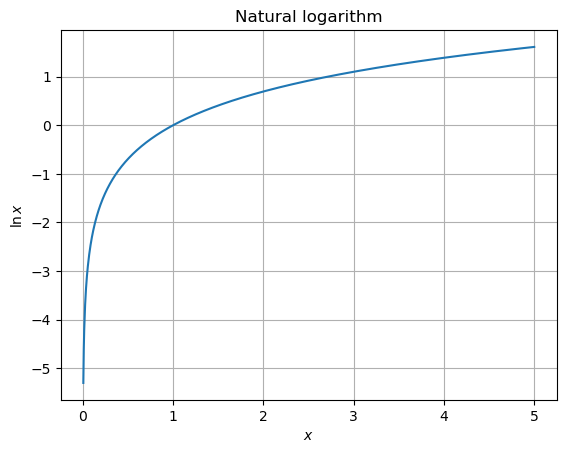

In [179]:
x = np.linspace(0, 5, 1001)
y = np.log(x)
plt.grid()
plt.title("Natural logarithm")
plt.xlabel(r"$x$")
plt.ylabel(r"$\ln{x}$")
plt.plot(x, y)

The logarithm goes asymptitically to $-\infty$ as $x \to 0$; it is not defined for *negative* arguments, $x < 0$. Now, what happens if we break this rule and compute the log of, say, -1? We use the [`np.log`](https://numpy.org/doc/stable/reference/generated/numpy.log.html) function provided by NumPy.[^numpy-functions]

[^numpy-functions]: NumPy provides a large number of functions (so-called universal functions (ufuncs)) that can operate on `np.ndarrays`.

In [181]:
np.log(-1), np.isnan(np.log(-1))

/tmp/ipykernel_714/3451937017.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-1), np.isnan(np.log(-1))


(nan, True)

The result is `NaN` as this is not a well-defined operation for this function. `NaN` is a special encoding for numerical calculations that do not have well-defined results.

:::{note} `NaN` is only available for floating points types but not for integral types. As a result, whenever Pandas encouters a `NaN` value in an operation, the the `dtype` will be changed to e.g. `float64` and all elements (also thos that are not `NaN`) will be type-cast to a floating points type.
:::

It is still possible to execute computations on `np.ndarrays` that have `NaN` entries. The result will mostly be, however, be (more) `NaN`(s) because e.g. `NaN + 3` still is `NaN`. So, whenever you encounter a `NaN` result in a computation performed with NumPy arrays (we *exclude* Pandas objects here intentionally), it is very likely that something went wrong and you have to do some debugging.

In [184]:
np.sum(np.log(np.arange(-1,5)))

/tmp/ipykernel_714/1305000031.py:1: RuntimeWarning: divide by zero encountered in log
  np.sum(np.log(np.arange(-1,5)))
/tmp/ipykernel_714/1305000031.py:1: RuntimeWarning: invalid value encountered in log
  np.sum(np.log(np.arange(-1,5)))


nan

(nans-in-series)=
### `NaN`s in `Series`

When performing operations on `Series` Pandas chooses to deal with `NaN` values (a bit?) differently by default. We illustrate this with the following examples. We first construct a `Series` with `NaN` values and then sum all values with the `np.sum` functions that we have used earlier on a `np.ndarray` (yes, it is possible to feed `Series` objects into NumPy functions):

In [185]:
s = pd.Series([np.nan, *range(5), np.nan])
s

0    NaN
1    0.0
2    1.0
3    2.0
4    3.0
5    4.0
6    NaN
dtype: float64

In [187]:
np.sum(s), np.sum(s.to_numpy())

(10.0, nan)

For comparison we also include the result of applying  `np.sum` to the underlying NumPy data buffer. The results *differ*! Close inspection of the result of `np.sum(s)` reveals that Pandas chooses to *skip* all `NaN` values and only summing those that are not `NaN`s.

:::{warning} Pandas `Series` (and also `DataFrames`) tend to ignore `NaN` values if not told otherwise. See e.g. the documentation of the [`Series.mean`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html) method.
:::

In [190]:
not_nan_mask = ~np.isnan(s.to_numpy())
np.sum(s.to_numpy()[not_nan_mask])
np.sum(np.isnan(s.to_numpy()))

2

Pandas has special methods to detect `NaN` values. Calling the [`.isna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isna.html) method on a `Series` returns another `Series` with `dtype == bool` of the same size where an entry equals `True` if the entry at the same position in the original `Series` was `NaN`. Otherwise an entry is `False`.

In [192]:
s.isna().any()

True

The [`.notna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.notna.html#pandas.Series.notna) method is the boolean inverse of the `.isna()` method: Its result is the element-wise negation of the output of `.isna()`.

In [193]:
s.notna()

0    False
1     True
2     True
3     True
4     True
5     True
6    False
dtype: bool

Finally, we note that you can also choose to remove `NaN` values from a `Series`. This can be accomplished with the [`.dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html#pandas.Series.dropna) method. The result is a new `Serres` object without the `NaN` entries:

In [194]:
s.dropna()

1    0.0
2    1.0
3    2.0
4    3.0
5    4.0
dtype: float64

### Exercise

In [196]:
rng = np.random.default_rng(seed=42)

You are given a `Series` containing some `NaN` values.

In [197]:
data = list(range(100)) + [np.nan] * rng.choice(range(10, 50)) + list(range(50))
np.random.shuffle(data)
s = pd.Series(data=data)
s

0       NaN
1      71.0
2      34.0
3      40.0
4      92.0
       ... 
158    75.0
159    47.0
160    10.0
161    13.0
162    85.0
Length: 163, dtype: float64

How many `NaN` and non-`NaN` values are contained in the `Series`?

In [198]:
s.isna().sum(), s.notna().sum()

(13, 150)

Determine the mean and the max value, as well as the standard deviation by passing the `Series` to suitable [NumPy functions](https://numpy.org/doc/stable/index.html) (use the search!)

In [199]:
(
    np.mean(s),
    np.max(s),
    np.std(s)
)

(41.166666666666664, 99.0, 27.637032321788016)

Determine the mean and the max value, as well as the standard deviation by using the underlying NumPy array. Of course, the results must be the same as when using the `Series`.

In fact, there are multiple ways to do this. Search the [NumPy documentation](https://numpy.org/doc/stable/index.html) for "nan" to find suitable functions.

In [200]:
buffer = s.to_numpy()
not_nan_mask = ~np.isnan(buffer)
(
    np.mean(buffer[not_nan_mask]),
    np.max(buffer[not_nan_mask]),
    np.std(buffer[not_nan_mask])
)

(41.166666666666664, 99.0, 27.637032321788016)

In [201]:
buffer = s.to_numpy()
not_nan_mask = ~np.isnan(buffer)
(
    np.nanmean(buffer),
    np.nanmax(buffer),
    np.nanstd(buffer)
)

(41.166666666666664, 99.0, 27.637032321788016)

Come up with two different methods to return a `Series` with *all* `NaN` values removed and `dtype == int`.

In [203]:
s.dropna().astype('int')

1      71
2      34
3      40
4      92
5      25
       ..
158    75
159    47
160    10
161    13
162    85
Length: 150, dtype: int64

In [204]:
s.loc[s.notna()].astype(int)

1      71
2      34
3      40
4      92
5      25
       ..
158    75
159    47
160    10
161    13
162    85
Length: 150, dtype: int64

In [205]:
s.describe()

count    150.000000
mean      41.166667
std       27.729619
min        0.000000
25%       18.250000
50%       37.000000
75%       61.750000
max       99.000000
dtype: float64